# Compare Multiple Frequency Distributions to Extract Valuable Information from a Dataset

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the datasets

In [2]:
# Women’s National Basketball Association (WNBA)
df = pd.read_csv("DataSet/wnba.csv")

In [3]:
df.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,17-Jan-94,23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,14-May-82,35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,27-Oct-90,26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,11-Dec-88,28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,5-Aug-94,23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [4]:
# Check the shape
df.shape

(143, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          143 non-null    object 
 1   Team          143 non-null    object 
 2   Pos           143 non-null    object 
 3   Height        143 non-null    int64  
 4   Weight        142 non-null    float64
 5   BMI           142 non-null    float64
 6   Birth_Place   143 non-null    object 
 7   Birthdate     143 non-null    object 
 8   Age           143 non-null    int64  
 9   College       143 non-null    object 
 10  Experience    143 non-null    object 
 11  Games Played  143 non-null    int64  
 12  MIN           143 non-null    int64  
 13  FGM           143 non-null    int64  
 14  FGA           143 non-null    int64  
 15  FG%           143 non-null    float64
 16  15:00         143 non-null    int64  
 17  3PA           143 non-null    int64  
 18  3P%           143 non-null    

In [6]:
df.describe()

,Height,Weight,BMI,Age,Games Played,MIN,FGM,FGA,FG%,15:00,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
count,143.000000,142.000000,142.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,184.566434,78.978873,23.091214,27.076923,24.356643,496.972028,73.895105,167.622378,42.901399,14.727273,...,21.923077,61.160839,83.083916,44.230769,17.608392,9.713287,32.090909,201.790210,1.132867,0.006993
std,8.685068,10.996110,2.073691,3.679170,7.104259,290.777320,56.110895,117.467095,10.111498,17.355919,...,21.509276,49.761919,68.302197,41.483017,13.438978,12.520193,21.502017,153.381548,2.900310,0.083624
min,165.000000,55.000000,18.390675,21.000000,2.000000,12.000000,1.000000,3.000000,14.300000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
25%,176.500000,71.500000,21.785876,24.000000,22.000000,240.000000,26.000000,66.000000,36.950000,0.000000,...,7.000000,25.500000,34.000000,11.000000,7.000000,2.000000,13.500000,75.000000,0.000000,0.000000
50%,185.000000,79.000000,22.873314,27.000000,27.000000,504.000000,69.000000,152.000000,42.000000,10.000000,...,13.000000,50.000000,62.000000,33.000000,15.000000,5.000000,28.000000,177.000000,0.000000,0.000000
75%,191.000000,86.000000,24.180715,30.000000,29.000000,750.000000,105.000000,244.500000,48.550000,22.000000,...,31.000000,84.000000,116.000000,66.500000,27.000000,12.000000,48.000000,277.500000,1.000000,0.000000
max,206.000000,113.000000,31.555880,36.000000,32.000000,1018.000000,227.000000,509.000000,100.000000,88.000000,...,113.000000,226.000000,334.000000,206.000000,63.000000,64.000000,87.000000,584.000000,17.000000,1.000000


In [7]:
df.isnull().sum()

Name            0
Team            0
Pos             0
Height          0
Weight          1
BMI             1
Birth_Place     0
Birthdate       0
Age             0
College         0
Experience      0
Games Played    0
MIN             0
FGM             0
FGA             0
FG%             0
15:00           0
3PA             0
3P%             0
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TO              0
PTS             0
DD2             0
TD3             0
dtype: int64

In [8]:
df.isnull().sum().any()

True

#### At first, we try to represent the experience column into Exper_ordianl column which variable measured in ordinal scale. In the below table, we try to describe the level of experience of players according to the following labeling convention:

In [9]:
df.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3'],
      dtype='object')

In [10]:
df.Experience.value_counts()

R     23
3     19
6     14
5     14
1     12
2     11
4     11
9     11
10     5
12     4
11     4
7      4
8      3
13     3
14     3
15     2
Name: Experience, dtype: int64

In [11]:
df[["Experience"]]

,Experience
0,2
1,12
2,4
3,6
4,R
...,...
138,6
139,9
140,2
141,8


In [12]:
#Replace ‘R’ value into zero 

df.Experience = df.Experience.replace(['R'], 0)

In [13]:
df.Experience.value_counts()

0     23
3     19
6     14
5     14
1     12
2     11
4     11
9     11
10     5
12     4
11     4
7      4
8      3
13     3
14     3
15     2
Name: Experience, dtype: int64

In [14]:
df.Experience.dtype

dtype('O')

In [15]:
#convertion of object data to numeric
df.Experience = pd.to_numeric(df["Experience"])

In [16]:
df.Experience.dtypes

dtype('int64')

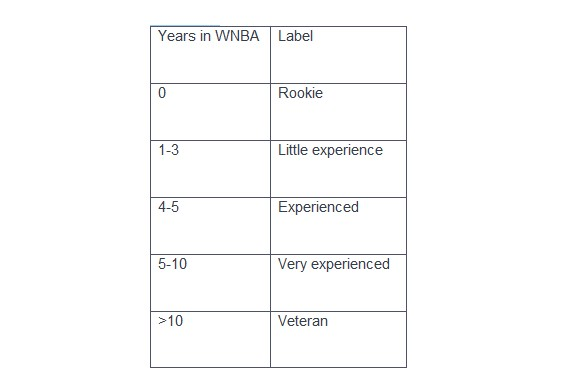

In [17]:
# Create conditions

conditions = [
    (df['Experience'] == 0),
    (df['Experience'] >= 1) & (df['Experience'] <= 3),
    (df['Experience'] >= 4) & (df['Experience'] <= 5),
    (df['Experience'] > 5) & (df['Experience'] <= 10),
    (df['Experience'] > 10)
    ]

In [18]:
#cpmparing values
values = ['Rookie', 'Little experience', 'Experienced', 'Very experienced','Veteran']

#create new column with those condition
df["Exper_ordianl"] = np.select(conditions, values)

In [19]:
df.Exper_ordianl[:10]

0    Little experience
1              Veteran
2          Experienced
3     Very experienced
4               Rookie
5               Rookie
6               Rookie
7     Very experienced
8    Little experience
9          Experienced
Name: Exper_ordianl, dtype: object

In [20]:
df.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3,Exper_ordianl
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,17-Jan-94,23,Michigan State,...,22,28,12,3,6,12,93,0,0,Little experience
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,14-May-82,35,Duke,...,82,101,72,63,13,40,217,0,0,Veteran
2,Alex Bentley,CON,G,170,69.0,23.875433,US,27-Oct-90,26,Penn State,...,36,40,78,22,3,24,218,0,0,Experienced
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,11-Dec-88,28,Georgia Tech,...,134,169,65,20,10,38,188,2,0,Very experienced
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,5-Aug-94,23,Baylor,...,9,12,12,7,0,14,50,0,0,Rookie


In [21]:
df.Exper_ordianl.value_counts()

Little experience    42
Very experienced     37
Experienced          25
Rookie               23
Veteran              16
Name: Exper_ordianl, dtype: int64

In [22]:
df.Pos.value_counts()

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64

In [23]:
df.groupby("Exper_ordianl")["Pos"].value_counts()

Exper_ordianl      Pos
Experienced        G       9
                   C       6
                   F       6
                   F/C     2
                   G/F     2
Little experience  G      14
                   F      13
                   C       8
                   F/C     4
                   G/F     3
Rookie             G      14
                   C       4
                   F       4
                   F/C     1
Very experienced   G      16
                   C       6
                   F       6
                   G/F     5
                   F/C     4
Veteran            G       7
                   F       4
                   G/F     3
                   C       1
                   F/C     1
Name: Pos, dtype: int64

#### Now we try to segment the dataset according to the level of experience. Then we generate frequency distribution for each segment of the dataset. Finally, we try to have a comparative analysis of the frequency distribution.

In [24]:
# making segment of datset
rookies_segment = df[df['Exper_ordianl'] == 'Rookie']

little_xp_segment = df[df['Exper_ordianl'] == 'Little experience']

experienced_segment = df[df['Exper_ordianl'] == 'Experienced']

very_xp_segment = df[df['Exper_ordianl'] == 'Very experienced']

veterans_segment =  df[df['Exper_ordianl'] == 'Veteran']

# counts the value of the position for each segment

rookies_segment_distro = rookies_segment['Pos'].value_counts()

little_xp_segment_distro = little_xp_segment['Pos'].value_counts()

experienced_segment_distro = experienced_segment['Pos'].value_counts()

very_xp_segment_distro = very_xp_segment['Pos'].value_counts()

veterans_segmen_distro = veterans_segment['Pos'].value_counts()
 
print(rookies_segment_distro, '\n\n', little_xp_segment_distro, '\n\n', experienced_segment_distro, '\n\n',
     very_xp_segment_distro, '\n\n', veterans_segmen_distro)

G      14
C       4
F       4
F/C     1
Name: Pos, dtype: int64 

 G      14
F      13
C       8
F/C     4
G/F     3
Name: Pos, dtype: int64 

 G      9
C      6
F      6
F/C    2
G/F    2
Name: Pos, dtype: int64 

 G      16
F       6
C       6
G/F     5
F/C     4
Name: Pos, dtype: int64 

 G      7
F      4
G/F    3
C      1
F/C    1
Name: Pos, dtype: int64


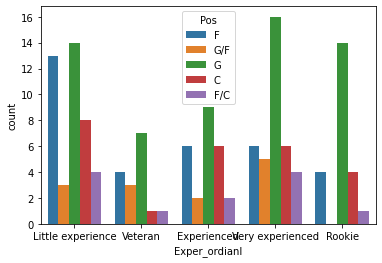

In [25]:
# show it by barchar
sns.countplot(x="Exper_ordianl", hue="Pos", data=df)
plt.show()

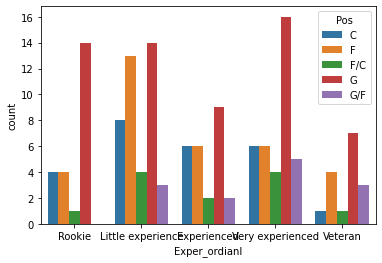

In [26]:
# Customize the barchart
sns.countplot(x="Exper_ordianl", hue="Pos", data=df, 
              order=['Rookie', 'Little experience', 'Experienced', 'Very experienced', 'Veteran'],
              hue_order=['C', 'F', 'F/C', 'G', 'G/F'])
plt.show()

### Kernel Density Estimate Plots
A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

### Why Kernel Density Estimate Plots are used?
The Kernel Density Estimate Plots(KDE plots) are mainly used to comparing the histogram. Now we try to understand the need for KDE plots.
The easiest way to compare two histograms is to superimpose one on top of the other. We can do that by using the pandas visualization methods mission.

<AxesSubplot:ylabel='Frequency'>

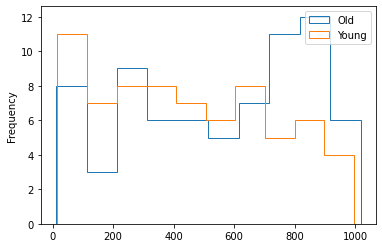

In [27]:
df[df.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True)
df[df.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)

#### In the above, We want to compare two different scenarios. One for the players who have aged above 27 and others for the players who have aged below 27. We draw two histograms one over another so that we can compare them easily. We can easily compare between two histograms. What if for the number of histograms more than two. Is it easy to compare between those histograms? The necessity of KDE plot comes in for such kinds of scenarios.

In [28]:
df.Age.value_counts(ascending=True)

36     1
21     2
33     3
35     4
34     5
31     8
29     8
32     8
30     9
22    10
26    12
27    13
28    14
23    15
25    15
24    16
Name: Age, dtype: int64

### How to generate KDE plots?
The Series.plot.kde() method are used to generate kde plots.

<AxesSubplot:ylabel='Density'>

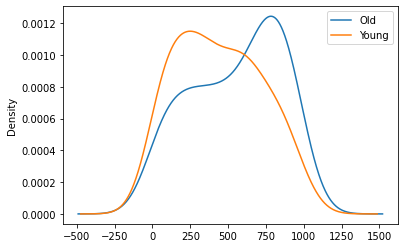

In [29]:
df[df.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
df[df.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)

### How to generate Strips plots
The sns.stripplot() function are used to generate strips plots.

<AxesSubplot:xlabel='Pos', ylabel='Height'>

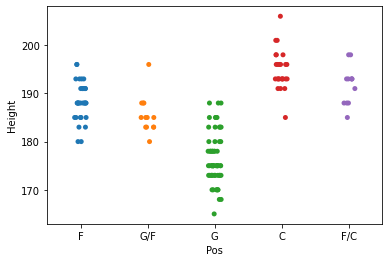

In [30]:
sns.stripplot(x = 'Pos', y = 'Height', data =df)

#### We place Pos variable on the x-axis and the Height variable on the y-axis.The pattern we can see in the graphs that most of the short players played for the Goalkeeper position and most of the tall players played for the Center Back position. You can also try it for the weight variable. The number of narrow strips is the same as the number of unique values in the nominal or ordinal variable.

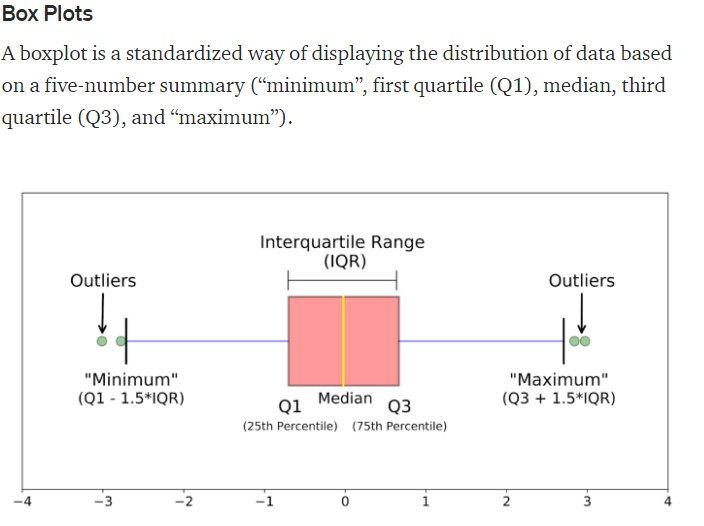

#### median (Q2 or 50th Percentile): It represents the middle value of the dataset.
first quartile (Q1or 25th Percentile): It represents the middle value between the smallest and median value dataset.
third quartile (Q3 or 75th Percentile): It represents the middle value between the highest and median value of the dataset.
interquartile range (IQR): It represents the value between 25th and 75th percentiles
whiskers: The whiskers are the two lines outside the box that extend to the highest and lowest observations. In the above graph, one line in the left and others in the right represent the whiskers.
outliers: A data point that is located outside the whiskers of the box plot. In the above graph, green points represent the outliers.

<AxesSubplot:xlabel='Pos', ylabel='Height'>

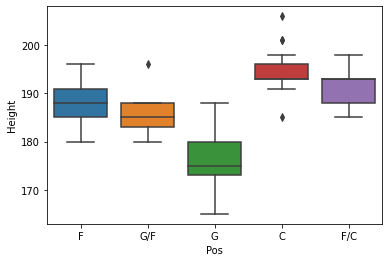

In [31]:
sns.boxplot(x = 'Pos', y = 'Height', data = df)

#### Outlier point denotes — -
If the points are larger than the upper quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).
If the points are lower than the lower quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).
We can also change the factor from 1.5 to custom value using whis parameter.

<AxesSubplot:xlabel='Pos', ylabel='Height'>

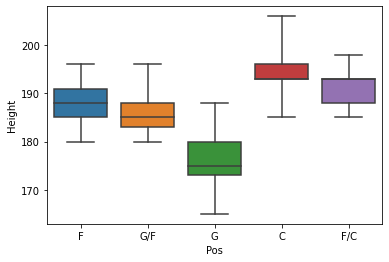

In [32]:
sns.boxplot(x = 'Pos', y = 'Height', data = df, whis=4)